In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Baca file Excel
df = pd.read_excel('data-link.xlsx')

In [ ]:
df

,Unnamed: 0,A,B,C,D
0,A,0,1,1,1
1,B,0,0,1,1
2,C,1,0,0,1
3,D,0,0,0,1


In [ ]:
# Mengambil kolom node yang akan digunakan
kolom= ['A', 'B', 'C', 'D'] # Ganti dengan nama kolom yang sesuai
adjacency_matrix = df[kolom].values
adjacency_matrix


array([[0, 1, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1]])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

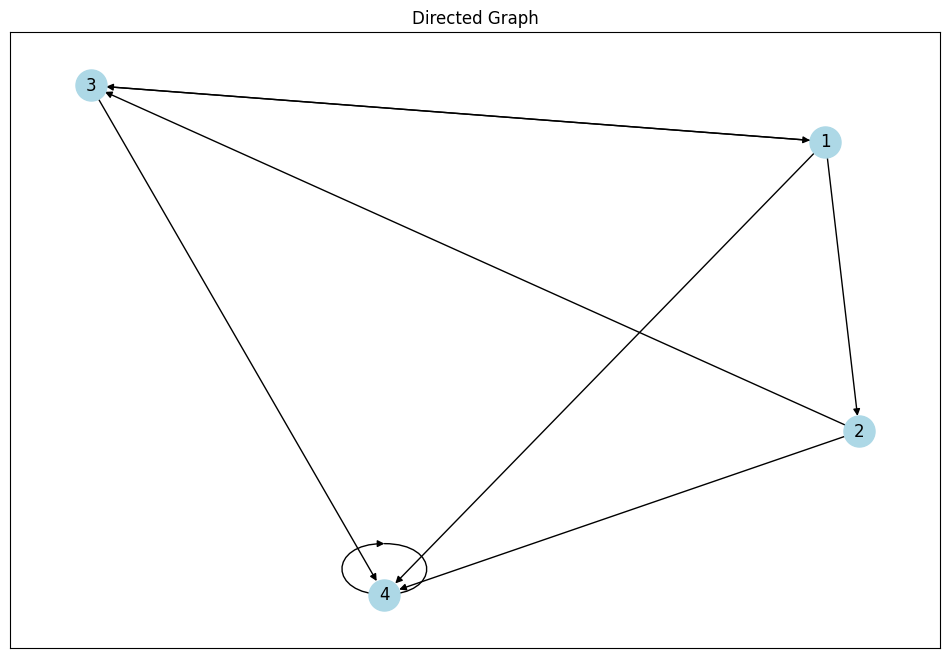

In [ ]:
# Membuat graf dari matriks adjacency
G = nx.DiGraph(adjacency_matrix)

# Atur label node dengan nama kolom
labels = {i: i+1 for i in range(len(adjacency_matrix))}

# Tampilkan graf
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, labels=labels, node_color='lightblue', node_size=500, with_labels=True, arrows=True)
plt.title("Directed Graph")
plt.show()

In [ ]:
# Inisialisasi nilai awal authority dan hub
jumlah_node = adjacency_matrix.shape[0]
skor_authority= np.ones(jumlah_node)
skor_hub = np.ones(jumlah_node)
# Iterasi algoritma HITS
for _ in range(3):
 # Update nilai hub
 skor_hub = np.dot(adjacency_matrix.T, skor_authority)
 # Normalisasi nilai hub
 skor_hub /= np.linalg.norm(skor_hub)
 # Update nilai authority
 skor_authority = np.dot(adjacency_matrix, skor_hub)
 # Normalisasi nilai authority
 skor_authority /= np.linalg.norm(skor_authority)
# Cetak nilai authority dan hub setelah konvergensi
print("Authority Scores:", skor_authority)
print("Hub Scores:", skor_hub)

Authority Scores: [0.65357971 0.54153747 0.40815386 0.33612671]
Hub Scores: [0.17321221 0.26944121 0.49397556 0.80832364]


In [ ]:
# Tampilkan nilai authority dan hub beserta nama node
print("Authority Scores:")
for i, score in enumerate(skor_authority):
 print(f"Node {kolom[i]}: {score}")
print("\nHub Scores:")
for i, score in enumerate(skor_hub):
 print(f"Node {kolom[i]}: {score}")

Authority Scores:
Node A: 0.6535797066992359
Node B: 0.5415374712650812
Node C: 0.4081538576529922
Node D: 0.33612670630246416

Hub Scores:
Node A: 0.1732122089780055
Node B: 0.26944121396578635
Node C: 0.49397555893727485
Node D: 0.808323641897359


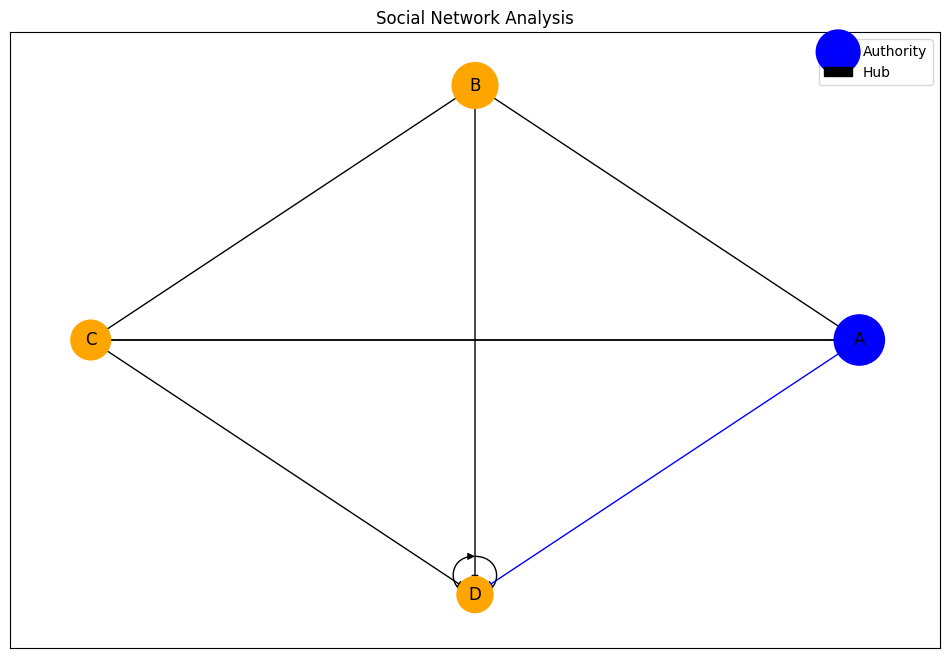

In [ ]:
# Buat graf berdasarkan matriks adjacency (graf berarah)
G = nx.DiGraph(adjacency_matrix)

# Atur label node dengan nama kolom
labels = {i: kolom[i] for i in range(len(kolom))}

# Atur ukuran node berdasarkan skor Hub dan Skor Authority
node_size_authority = 2000 * skor_authority
node_size_hub = 2000 * skor_hub

# Atur warna node berdasarkan jenis (Hub atau Authority)
node_color = ['blue' if score == max(skor_authority) else 'orange' for score in skor_authority]

# Tampilkan graf
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)

# Gambar node dan edge
nx.draw_networkx_nodes(G, pos, node_color = node_color, node_size = node_size_authority)
nx.draw_networkx_labels(G, pos, labels=labels)

# Gambar panah dengan warna sesuai jenis (Hub atau Authority)
for edge in G.edges:
  u, v = edge
  if skor_authority[u] == max(skor_authority) and skor_hub[v] == max(skor_hub):
    edge_color = 'blue'
  elif skor_authority[v] == max(skor_authority) and skor_hub[u] == max(skor_hub):
    edge_color = 'orange'
  else:
    edge_color = 'black'

  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, arrows=True)

# Tampilkan legenda
plt.legend(["Authority", "Hub"])

# Tampilkan graf
plt.title("Social Network Analysis")
plt.show()